<a href="https://colab.research.google.com/github/erichsiao1106/fightchou/blob/master/cnn0824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 18s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",
5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}
trans = ["飛機", "車", "鳥", "貓", "鹿",
"狗", "青蛙", "馬", "船", "卡車"]

青蛙


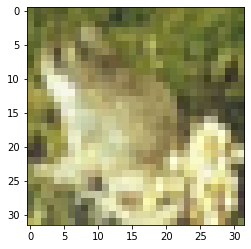

In [36]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
i = random.randint(0,49999)
# x_train[i]
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [ ]:
# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,  activation=None, )

In [49]:
from tensorflow.keras.layers import Conv2D , MaxPool2D
from tensorflow.keras.layers import Dense , Flatten ,Dropout
from tensorflow.keras.models import Sequential
layers=     [       
            Conv2D( 64 , 3 , padding="same" , activation="relu" , input_shape = (32 ,32 , 3)),
            MaxPool2D( ),
            Conv2D( 128 , 3 , padding="same" , activation="relu" ),
            MaxPool2D( ),
            Conv2D( 256 , 3 , padding="same" , activation="relu" ),
            MaxPool2D( ),
            Flatten(),
            Dense( 256 , activation="relu"), 
            Dropout(0.25),
            Dense( 10 , activation="softmax")

]
model = Sequential(layers)
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)             

In [51]:
from tensorflow.keras.losses import  SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [52]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [54]:
from tensorflow.keras.callbacks import  EarlyStopping , ModelCheckpoint
callbacks = [
             EarlyStopping ( patience = 5 , restore_best_weights=True) ,
             ModelCheckpoint ("cnn.h5" ,save_best_only=True )
]
model.fit(x_train_norm, 
     y_train, 
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 7s - loss: 1.8345 - accuracy: 0.3414 - val_loss: 1.4516 - val_accuracy: 0.4824
Epoch 2/50
225/225 - 7s - loss: 1.3003 - accuracy: 0.5414 - val_loss: 1.1738 - val_accuracy: 0.5924
Epoch 3/50
225/225 - 7s - loss: 1.0430 - accuracy: 0.6348 - val_loss: 0.9318 - val_accuracy: 0.6802
Epoch 4/50
225/225 - 7s - loss: 0.8817 - accuracy: 0.6931 - val_loss: 0.8895 - val_accuracy: 0.6958
Epoch 5/50
225/225 - 7s - loss: 0.7573 - accuracy: 0.7379 - val_loss: 0.7504 - val_accuracy: 0.7538
Epoch 6/50
225/225 - 7s - loss: 0.6606 - accuracy: 0.7715 - val_loss: 0.7302 - val_accuracy: 0.7512
Epoch 7/50
225/225 - 7s - loss: 0.5599 - accuracy: 0.8061 - val_loss: 0.7195 - val_accuracy: 0.7610
Epoch 8/50
225/225 - 7s - loss: 0.4741 - accuracy: 0.8347 - val_loss: 0.8744 - val_accuracy: 0.7168
Epoch 9/50
225/225 - 7s - loss: 0.3952 - accuracy: 0.8600 - val_loss: 0.7963 - val_accuracy: 0.7444
Epoch 10/50
225/225 - 7s - loss: 0.3261 - accuracy: 0.8844 - val_loss: 0.8188 - val_accuracy: 0.7576

In [55]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7693 - accuracy: 0.7408


[0.769262433052063, 0.7408000230789185]